<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# IOD Castone Project - Customer Experience (CX)

What is customer experience (CX), why is it important for business, and how can you improve it for your customers?

## Introduction

In [ ]:
IOD Capstone Project Notebook 4 with 7 emotion classification with Epochs 2 with CONFUSION MATRIX

## Import libraries

In [56]:
# Import libraries
import os
import cv2
import pandas as pd
import matplotlib 


In [57]:
# insert code here
import numpy as np
import keras
import tensorflow as tf
import tensorboard
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
from skimage.transform import resize


# import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping

# import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models


## Define variables


In [ ]:
#num_classses = 5 : This variable defines the number of classes or the emotions that we will be dealing with in training our model.
#img_rows,img_cols=48,48 : These variables define the size of the image array that we will be feeding to our neural network.
#batch_size=32: This variable defines the batch size.The batch size is a number of samples 
                #processed before the model is updated. The size of a batch must be more than or equal to one and less than
                # or equal to the number of samples in the training dataset.
#The number of epochs is the number of complete passes hrough the training dataset. 

In [6]:
num_classes=5
img_rows,img_cols=48,48
batch_size=64

## Load data
Using the fer2013 dataset which is an open source dataset hosted on kaggle
The dataset contains totally 7 classes namely Angry,Disgust,Fear,Happy,Sad,Surprise and Neutral.The training set consists of a total of 28,709 examples.

In [7]:
data = pd.read_csv('fern2013.csv') 

In [8]:
data.shape

(35887, 3)

In [9]:
data.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [10]:
data.tail(5)

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,Validation
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,Validation
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,Validation
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,Validation
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,Validation


In [11]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Digust,547
2,Fear,5121
3,Happy,8989
4,Sad,6077
5,Surprise,4002
6,Neutral,6198


C:\Users\Reji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


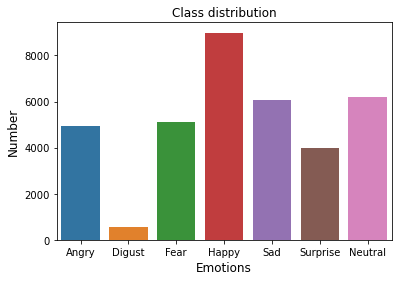

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

<ipython-input-13-483c62a7888b>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([image.astype(np.uint8), emotion])
<ipython-input-13-483c62a7888b>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([image.astype(np.uint8), emotion])
<ipython-input-13-483c62a7888b>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nd

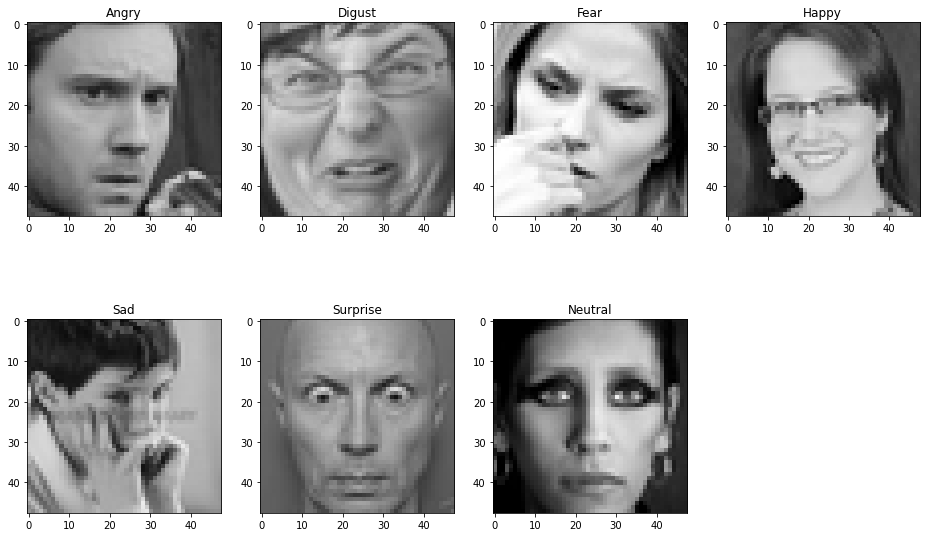

In [13]:
def row2image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split())
    img = img.reshape(48,48)
    image = np.zeros((48,48,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return np.array([image.astype(np.uint8), emotion])

plt.figure(0, figsize=(16,10))
for i in range(1,8):
    face = data[data['emotion'] == i-1].iloc[0]
    img = row2image(face)
    plt.subplot(2,4,i)
    plt.imshow(img[0])
    plt.title(img[1])

plt.show()  

In [91]:
#split data into training, test set
data_train = data[data['Usage']=='Training'].copy()
data_test  = data[data['Usage']=='Test'].copy()
data_valid  = data[data['Usage']=='Validation'].copy()
print("train shape: {}, \ntest shape: {},\nvalid shape: {}".format(data_train.shape, data_test.shape,data_valid.shape ))

train shape: (28709, 3), 
test shape: (3589, 3),
valid shape: (3589, 3)


In [15]:
#initilize parameters
num_classes = 7 
width, height = 48, 48
num_epochs = 1
batch_size = 64
num_features = 64

In [92]:
def CRNO(df, dataName):
    df['pixels'] = df['pixels'].apply(lambda pixel_sequence: [int(pixel) for pixel in pixel_sequence.split()])
    data_X = np.array(df['pixels'].tolist(), dtype='float32').reshape(-1,width, height,1)/255.0   
    data_Y = to_categorical(df['emotion'], num_classes)  
    print(dataName, "_X shape: {}, ", dataName, "_Y shape: {}".format(data_X.shape, data_Y.shape))
    return data_X, data_Y

    
train_X, train_Y = CRNO(data_valid, "validation") #training data
test_X, test_Y   = CRNO(data_test, "test") #test data

validation _X shape: {},  validation _Y shape: (3589, 48, 48, 1)
test _X shape: {},  test _Y shape: (3589, 48, 48, 1)


In [138]:
model = Sequential()

#module 1
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), input_shape=(width, height, 1), data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#module 2
model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#module 3
model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#flatten
model.add(Flatten())

#dense 1
model.add(Dense(2*2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#dense 2
model.add(Dense(2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#dense 3
model.add(Dense(2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#output layer
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 256)       2560      
_________________________________________________________________
batch_normalization_9 (Batch (None, 46, 46, 256)       1024      
_________________________________________________________________
activation_9 (Activation)    (None, 46, 46, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 256)       590080    
_________________________________________________________________
batch_normalization_10 (Batc (None, 46, 46, 256)       1024      
_________________________________________________________________
activation_10 (Activation)   (None, 46, 46, 256)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 256)      

C:\Users\Reji\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [95]:
#y_pred = ednn.predict(X_test)
y_pred = np.asarray([np.argmax(e) for e in train_Y])
y_true = np.asarray([np.argmax(e) for e in test_Y])

In [96]:
y_pred.shape

(3589,)

In [104]:
y_pred


array([0, 5, 6, ..., 0, 3, 2], dtype=int64)

In [105]:
y_true.shape

(3589,)

In [106]:
y_true

array([0, 1, 4, ..., 4, 4, 4], dtype=int64)

In [107]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [66]:
test_true = np.argmax(test_Y, axis=1)
test_pred = np.argmax(model.predict(test_X), axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

CNN Model Accuracy on test set: 0.1179


In [132]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_pred, y_true, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_pred, y_true)
    fig = plt.figure(figsize=(6,6))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    # ax.set_title('Confusion Matrix')
    labels = ('Angry','Digust','Fear','Happy','Sad', 'Surprise', 'Neutral')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [136]:
print(metrics.confusion_matrix(y_pred, y_true))

[[ 65  10  64 114  99  51  88]
 [ 10   0   8  12   8   6  11]
 [ 67   5  73 144  93  57  89]
 [123  16 130 219 151 106 134]
 [ 80   7  81 164 112  61  89]
 [ 49   7  53  97  72  55  83]
 [ 73  11  87 145 118  79 113]]


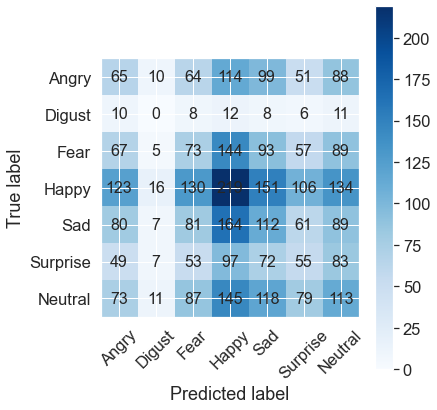

In [137]:
plot_confusion_matrix(y_pred, y_true)
plt.show()

In [27]:
# data generator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)


es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

#history = model.fit_generator(data_generator.flow(train_X, train_Y, batch_size),
#                                steps_per_epoch=len(train_X) / batch_size,
#                                epochs=num_epochs,
#                                verbose=2, 
#                                callbacks = [es],
#                                test_data=(test_X, test_Y))
hist = model.fit(train_X,train_Y,
               batch_size == 64, 
               epochs = 2, 
               validation_split = 0.2)

Epoch 1/2
22967/22967 [==============================] - 4331s 188ms/step - loss: 1.8193 - accuracy: 0.2509 - val_loss: 29912.3320 - val_accuracy: 0.1466
Epoch 2/2
22967/22967 [==============================] - 15312s 667ms/step - loss: 1.8109 - accuracy: 0.2512 - val_loss: 29606.7051 - val_accuracy: 0.1428


In [17]:
model.evaluate(test_X, test_Y)[1]

225/225 [==============================] - 516s 2s/step - loss: 23815.6973 - accuracy: 0.1477


0.14767344295978546

<function matplotlib.pyplot.show(close=None, block=None)>

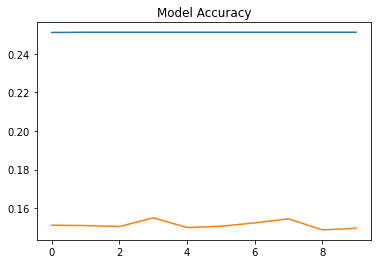

In [21]:
#visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title ('Model Accuracy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

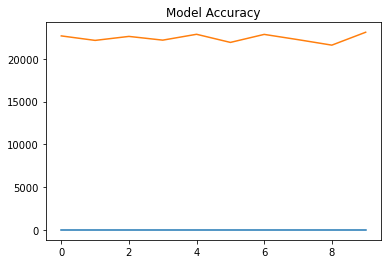

In [22]:
#visualize the loss accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title ('Model Accuracy')
plt.show

In [78]:
#![title](methil.jpg)

In [79]:
#from IPython.display import Image
#Image(filename="methil.jpg", width=48, height=48)
#color_mode='grayscale')

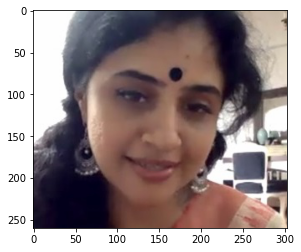

In [136]:
new_image = plt.imread('methil.jpg')
img =plt.imshow(new_image)


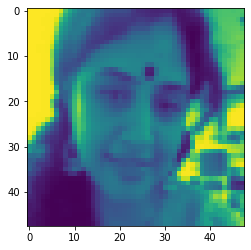

In [137]:
#resize Image
from skimage.transform import resize
resized_image = resize(new_image,(48,48,1))
img = plt.imshow(resized_image)

## Create predictions

In [138]:
# Model Prediction
predictions = model.predict(np.array([resized_image]))
predictions
                                    

array([[0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [139]:
#sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6]
x = predictions

for i in range(7):
    for j in range(7):
        if x[0][list_index[i]] >x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

#show the sorted lables in order
print(list_index)

[5, 1, 2, 3, 4, 0, 6]


In [140]:
#print the 7 predictions
for i in range(7):
    print(emotion_map[list_index[i]], ':', round(predictions[0][list_index[i]] * 100,2), '%')

Surprise : 100.0 %
Digust : 0.0 %
Fear : 0.0 %
Happy : 0.0 %
Sad : 0.0 %
Angry : 0.0 %
Neutral : 0.0 %


## Evaluate the model

![](methil.jpg)

## Visualisation 

In [ ]:
The goal of this exercise was to analyse the facial expressions of customers and predict the customer experience
using by the features like happy, sad, surprise etc features.

The above image comes as a surprise and agreeable to the visual analysis of the image.



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



